In [72]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
%matplotlib inline

In [5]:
# Reading the Data
df = pd.read_csv("dataset - dataset.csv")

In [6]:
print(df.head(10))

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   
5   57    1   0     140   192    0        1       148     0      0.4    1   
6   56    0   1     140   294    0        0       153     0      1.3    1   
7   44    1   1     120   263    0        1       173     0      0.0    2   
8   52    1   2     172   199    1        1       162     0      0.5    2   
9   57    1   2     150   168    0        1       174     0      1.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
5    0  

In [9]:
#The info() function shows us the data type of each column, number of columns, memory usage, and the number of records in the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.shape

(303, 14)

In [8]:
# Check if there any null value in the Dataset
df.isnull == True

False

In [12]:
#The corr() function displays the correlation between different variables in our dataset:
df.corr()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [13]:
#Start by importing the SelectKBest library:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [81]:
#define X & Y:
X= df.iloc[:,0:12]    
Y= df.iloc[:,-1]   

In [37]:
#Select the top 3 features:
best_features= SelectKBest(score_func=chi2, k=4)
fit= best_features.fit(X,Y)

In [38]:
#Now we create data frames for the features and the score of each feature
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [39]:
#Finally, we’ll combine all the features and their corresponding scores in one data frame:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
5,fbs,0.202934
6,restecg,2.978271
1,sex,7.576835
10,slp,9.804095
3,trtbps,14.823925
0,age,23.286624
4,chol,23.936394
8,exng,38.914377
2,cp,62.598098
11,caa,66.440765


In [46]:
#Finally, we’ll combine all the features and their corresponding scores in one data frame:
X= df[['cp','caa', 'oldpeak','thalachh']] 
Y= df[['output']] 

In [47]:
#split the dataset into train and test:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [48]:
#create a logistic regression body:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Public\Documents\Anaconda_daibi\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [49]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

     cp  caa  oldpeak  thalachh
69    0    0      0.0       163
300   0    2      3.4       141
220   0    3      4.0       154
134   1    0      0.0       163
7     1    0      0.0       173
..   ..  ...      ...       ...
254   3    0      0.0       125
171   1    0      1.0       168
174   0    2      2.4       132
42    0    0      3.0       148
65    0    0      1.4       182

[122 rows x 4 columns]
[1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1
 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1
 0 0 1 1 1 0 1 1 0 0 0]


In [77]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("accuracy:" ,accuracy_score(y_test, y_pred))
print("precision:" ,precision_score(y_test, y_pred, average=None, zero_division=1))
print("recall:" ,recall_score(y_test, y_pred, average=None, zero_division=1))
print("CL report:" ,metrics.classification_report(y_test, y_pred, zero_division=1))

accuracy: 0.7950819672131147
precision: [0.8        0.79104478]
recall: [0.75862069 0.828125  ]
CL report:               precision    recall  f1-score   support

           0       0.80      0.76      0.78        58
           1       0.79      0.83      0.81        64

    accuracy                           0.80       122
   macro avg       0.80      0.79      0.79       122
weighted avg       0.80      0.80      0.79       122



In [78]:
#To determine the ROC curve, first define the metrics:
y_pred_proba= logreg.predict_proba(X_test) [::,1]

#Then, calculate the true positive and false positive rates:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [79]:
#calculate the AUC to see the model's performance:
auc= metrics.roc_auc_score(y_test, y_pred_proba)


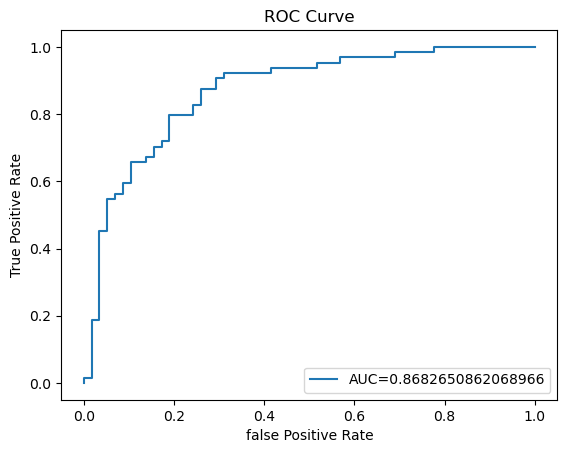

In [80]:
# plot the ROC curve:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)